#**Construindo modelos de QSAR machine learning para investigação de fármacos bloqueadores "C-C chemokine receptor type 5 para tratamento de HIV"**

In [3]:
## Passo 1: Corrigindo os problemas de incompatibilidades de sklearn e Lazypredict
## Passo 2: Instalando o pacote lazypredict
## Passo 3: importação e visualização do banco de dados pre-tratada
## passo 4: Definindo as variáveis preditoras e de resposta
## passo 5: Seleção de variáveis importantes
## Passo 6: divisão dos dados de treinamento e de teste
## Passo 7: Treinamento de diversos algoritmos
## Passo 8: Seleção do melhor algoritmo
## Passo 9: Teste do melhor algorítmo
## Passo 10: Salvando o modelo para o deploy

##**Passo 1: Corrigindo os problemas de incompatibilidades de sklearn e Lazypredict**

In [4]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==0.23.1

Found existing installation: scikit-learn 0.23.1
Uninstalling scikit-learn-0.23.1:
  Successfully uninstalled scikit-learn-0.23.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-0.23.1-cp37-cp37m-manylinux1_x86_64.whl (6.8 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.1 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.1 which is incompatible.


##**Passo 2: Instalando o pacote lazypredict**

In [5]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##**Passo 3: importação e visualização do banco de dados pre-tratada**

In [6]:
### 3.1: Importando o dataset

from google.colab import files
uploaded = files.upload()

Saving dataset_final.csv to dataset_final.csv


In [7]:
### 3.2: Visualizando o dataset importado

import pandas as pd
df = pd.read_csv("dataset_final.csv")
display (df.head())

,Unnamed: 0,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.474955
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.552842
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.000000
3,3,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.455932
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.823909


In [11]:
## Removendo variável não informativa
df = df.drop("Unnamed: 0", axis = 1)

In [13]:
df.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.474955
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.552842
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.000000
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.455932
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.823909


##**passo 4: Definindo as variáveis preditoras e de resposta**

In [14]:
x = df.drop("pIC50", axis = 1)
y = df["pIC50"]

In [15]:
x

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2925,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2926,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2927,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [16]:
y

0       6.474955
1       7.552842
2       8.000000
3       7.455932
4       7.823909
          ...   
2924    8.443697
2925    8.958607
2926    8.958607
2927    7.459671
2928    8.244125
Name: pIC50, Length: 2929, dtype: float64

##**passo 5: Seleção de variáveis importantes**

In [17]:
### 3.1. Removendo descritores com baixa variância
from sklearn.feature_selection import VarianceThreshold

def remove_baixa_variancia(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]
x = remove_baixa_variancia(x, threshold=0.1)
x

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP13,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP24,...,PubchemFP691,PubchemFP692,PubchemFP696,PubchemFP697,PubchemFP698,PubchemFP704,PubchemFP711,PubchemFP712,PubchemFP714,PubchemFP777
0,0,0,0,0,0,1,1,1,0,0,...,1,0,1,1,1,0,0,1,0,0
1,0,0,0,0,1,1,1,1,0,0,...,1,0,1,1,1,0,0,1,0,0
2,0,0,0,0,1,1,1,1,0,0,...,1,0,1,1,1,0,1,1,0,0
3,1,1,1,1,0,0,1,0,0,0,...,0,0,1,1,0,0,1,1,0,0
4,0,0,0,0,0,1,1,1,0,0,...,1,0,1,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,1,0,0,0,0,1,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0
2925,1,1,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2926,1,0,0,0,0,1,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0
2927,1,1,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


##**Passo 6: Treinando e comparando vários modelos de machine learning**

In [18]:
### 6.1. Importando pacotes de visualização dos resultados dos modelos de machine learning
import seaborn as sns

### 6.2. Importando pacotes para construção de vários modelos de machine learning
import lazypredict
from lazypredict.Supervised import LazyRegressor

### 6.3. Importando pacotes para a divisão dos dados de treinamento e de teste 
import sklearn
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.5, random_state=123)
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
modelos,predições = clf.fit(x_treino, x_teste, y_treino, y_teste)

print(modelos)




 10%|▉         | 4/42 [00:00<00:07,  4.96it/s]/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4135860042189279, tolerance: 0.2586062741345034
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.38436311324323924, tolerance: 0.2586062741345034
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4051006075483201, tolerance: 0.2586062741345034
  tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning:

                                                      Adjusted R-Squared  \
Model                                                                      
HistGradientBoostingRegressor                                       0.60   
LGBMRegressor                                                       0.60   
RandomForestRegressor                                               0.60   
BaggingRegressor                                                    0.58   
SVR                                                                 0.56   
XGBRegressor                                                        0.56   
KNeighborsRegressor                                                 0.56   
NuSVR                                                               0.56   
MLPRegressor                                                        0.54   
GradientBoostingRegressor                                           0.54   
LassoCV                                                             0.46   
ElasticNetCV

In [20]:
### 6.4 Visualizando melhor os resultados de machine learning
#### Observações: o modelo HistGradientBoostingRegressor foi o que teve melhor desempenho (maior R2 e menor RMSE)
display(modelos)

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.60,0.66,0.89,3.53
LGBMRegressor,0.60,0.66,0.89,0.29
RandomForestRegressor,0.60,0.66,0.90,2.35
BaggingRegressor,0.58,0.64,0.92,0.29
SVR,0.56,0.63,0.94,1.32
XGBRegressor,0.56,0.63,0.94,1.16
KNeighborsRegressor,0.56,0.62,0.94,0.92
NuSVR,0.56,0.62,0.95,1.04
MLPRegressor,0.54,0.61,0.96,3.16


[(0.0, 1.0)]

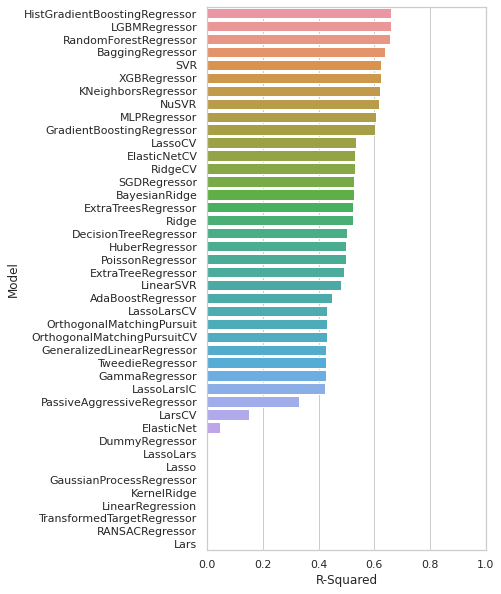

In [21]:
### 6.5 Visualizando os resultados de R2

# Gráfico de R2
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predições.index, x="R-Squared", data=predições)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

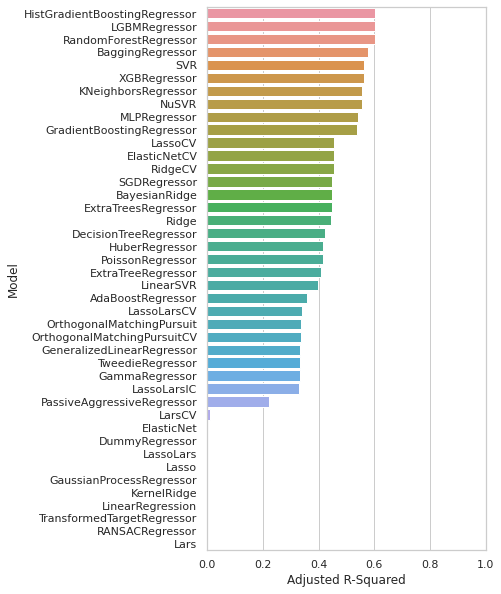

In [22]:
### 6.6 Visualizando os resultados da performance

# Gráfico de R2 ajustado
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predições.index, x="Adjusted R-Squared", data=predições)
ax.set(xlim=(0, 1))

[(0.0, 1.5)]

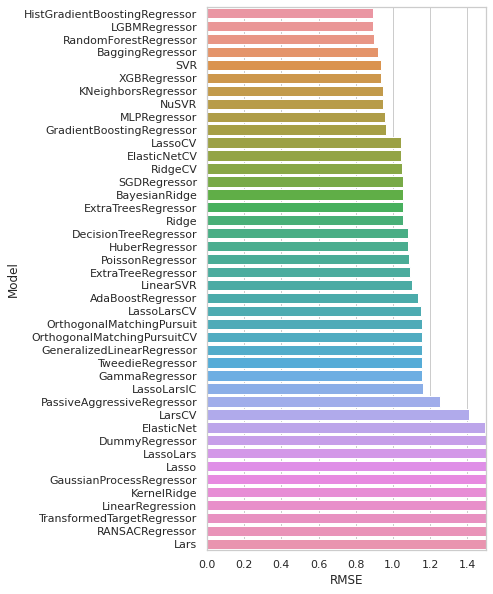

In [23]:
### 6.7 Visualizando os resultados da performance

# Gráfico de RMSE
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predições.index, x="RMSE", data=predições)
ax.set(xlim=(0, 1.5))

##**Passo 8: Seleção do melhor algoritmo**

In [27]:
## 8.1. Treinamento do melhor modelo:HistGradientBoostingRegressor

from sklearn.ensemble import HistGradientBoostingRegressor
modelo = HistGradientBoostingRegressor()
modelo.fit(x_treino, y_treino)
r2 = modelo.score(x_treino, y_treino)
r2

0.837070014330464

In [29]:
## 8.2 Testando o modelo treinado com as restantes 50% amostras que não entrara no treinamento
y_predito = modelo.predict(x_teste)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

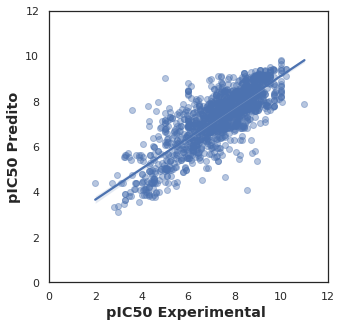

In [30]:
## Construindo o Scatter Plot dos valores pIC50 experiumentais versus valores preditos 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(y_teste, y_predito, scatter_kws={'alpha':0.4})
ax.set_xlabel('pIC50 Experimental ', fontsize='large', fontweight='bold')
ax.set_ylabel('pIC50 Predito', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

# Conclusões sobre o modelo:

In [34]:
### Diversos modeleos de Machine learning foram testados
### O modelo HistGradientBoostingRegressor teve maior capacidade preditiva com  R2 = 0.83
### Os resultados de Machine learning estão correlacionados com as observações da análise exploratória

In [36]:
## Passo 10 Salvando o modelo para deploy. Salvando no Formato pickle
import pickle

filename = 'Modelo_QSAR.sav'
pickle.dump(modelo, open(filename, 'wb'))
